In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape, Conv3D, MaxPooling3D
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
import sklearn
from tensorflow.keras import regularizers
#from prettytable import PrettyTable
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
import cv2
from keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


drive_dataset_path = '/content/drive/My Drive/EmoProjOutputs'
colab_dataset_path = '/content/EmoProjOutputs'

if not os.path.exists(colab_dataset_path):
    os.makedirs(colab_dataset_path)

video_data = []
labels = []

def load_videos_and_labels(dataset_path):
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith('.avi'):
                file_path = os.path.join(root, file)
                label = file.split('_')[0]

                cap = cv2.VideoCapture(file_path)
                frames = []
                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret:
                        break
                    frames.append(frame)
                cap.release()

                frames_array = np.array(frames)
                video_data.append(frames_array)
                labels.append(label)

load_videos_and_labels(drive_dataset_path)

video_data = np.array(video_data)
labels = np.array(labels)

np.save(os.path.join(colab_dataset_path, 'video_data.npy'), video_data)
np.save(os.path.join(colab_dataset_path, 'labels.npy'), labels)


In [ ]:

video_data.shape

(495, 30, 120, 160, 3)

In [ ]:
labels.shape

(495,)

In [ ]:
labels

array(['happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',
       'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',
       'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',
       'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',
       'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',
       'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',
       'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',
       'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',
       'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',
       'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',
       'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',
       'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',
       'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',
       'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',
       'happy', 'hap

In [ ]:
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
labels = encoded_labels

In [ ]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [ ]:
mapped = {0: 'angry', 1: 'happy', 3: 'sad', 4: 'surprised', 2: 'neutral'}

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(video_data, labels, test_size=0.2, random_state=42)


In [ ]:
x_train.shape

(396, 30, 120, 160, 3)

In [ ]:

input_shape = x_train[0].shape

In [ ]:


model = Sequential()

model.add(Conv3D(8, (3, 3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling3D((2, 2, 2)))
model.add(Dropout(0.25))

model.add(Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling3D((2, 2, 2)))
model.add(Dropout(0.25))

model.add(Conv3D(1024, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling3D((2, 2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d_6 (Conv3D)                    │ (None, 28, 118, 158, 8)     │             656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 28, 118, 158, 8)     │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_6 (MaxPooling3D)       │ (None, 14, 59, 79, 8)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 14, 59, 79, 8)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_7 (Conv3D)                    │ (None, 12, 57, 77, 32)      │           6,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 12, 57, 77, 32)      │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_7 (MaxPooling3D)       │ (None, 6, 28, 38, 32)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 6, 28, 38, 32)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_8 (Conv3D)                    │ (None, 4, 26, 36, 1024)     │         885,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 4, 26, 36, 1024)     │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_8 (MaxPooling3D)       │ (None, 2, 13, 18, 1024)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 2, 13, 18, 1024)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 479232)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │     122,683,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │              

 Total params: 123,599,317 (471.49 MB)

 Trainable params: 123,596,549 (471.48 MB)

 Non-trainable params: 2,768 (10.81 KB)

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d_6 (Conv3D)                    │ (None, 28, 118, 158, 8)     │             656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 28, 118, 158, 8)     │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_6 (MaxPooling3D)       │ (None, 14, 59, 79, 8)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 14, 59, 79, 8)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_7 (Conv3D)                    │ (None, 12, 57, 77, 32)      │           6,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 12, 57, 77, 32)      │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_7 (MaxPooling3D)       │ (None, 6, 28, 38, 32)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 6, 28, 38, 32)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_8 (Conv3D)                    │ (None, 4, 26, 36, 1024)     │         885,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 4, 26, 36, 1024)     │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_8 (MaxPooling3D)       │ (None, 2, 13, 18, 1024)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 2, 13, 18, 1024)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 479232)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │     122,683,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │              

 Total params: 123,599,317 (471.49 MB)

 Trainable params: 123,596,549 (471.48 MB)

 Non-trainable params: 2,768 (10.81 KB)

In [ ]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

In [ ]:
history = model.fit(x_train, y_train_onehot, epochs=23, batch_size=15, validation_data=(x_test, y_test_onehot))


Epoch 1/23
27/27 ━━━━━━━━━━━━━━━━━━━━ 48s 883ms/step - accuracy: 0.2954 - loss: 2.5075 - val_accuracy: 0.1313 - val_loss: 23.9928
Epoch 2/23
27/27 ━━━━━━━━━━━━━━━━━━━━ 45s 243ms/step - accuracy: 0.4890 - loss: 1.5962 - val_accuracy: 0.1313 - val_loss: 15.6424
Epoch 3/23
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - accuracy: 0.5644 - loss: 1.3302 - val_accuracy: 0.4040 - val_loss: 7.3731
Epoch 4/23
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 243ms/step - accuracy: 0.6053 - loss: 1.2510 - val_accuracy: 0.4141 - val_loss: 5.5295
Epoch 5/23
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 242ms/step - accuracy: 0.6446 - loss: 1.0623 - val_accuracy: 0.5051 - val_loss: 1.6258
Epoch 6/23
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 246ms/step - accuracy: 0.6749 - loss: 1.0093 - val_accuracy: 0.3838 - val_loss: 4.8229
Epoch 7/23
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.6971 - loss: 1.0674 - val_accuracy: 0.7374 - val_loss: 1.3074
Epoch 8/23
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 246ms/step - accuracy: 0.7711 - loss: 0.7808 - val_accu

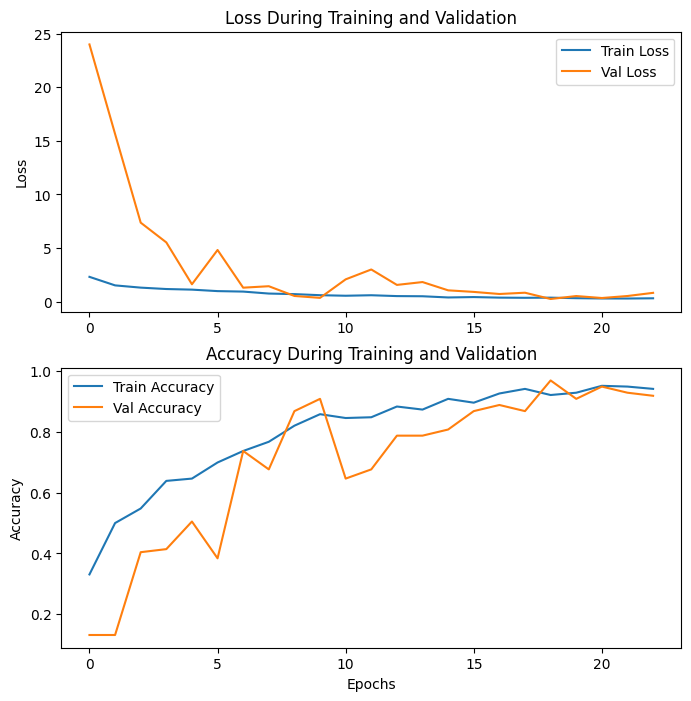

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Plotting the training and validation loss
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Val Loss')
axes[0].set_title('Loss During Training and Validation')
axes[0].set_ylabel('Loss')
axes[0].legend(loc='best')

# Plotting the training and validation accuracy
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Val Accuracy')
axes[1].set_title('Accuracy During Training and Validation')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='best')

# Setting the label for the x-axis
plt.xlabel('Epochs')
plt.show()


In [ ]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 618ms/step


In [ ]:
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred))

Balanced accuracy: 0.9004926108374385


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step


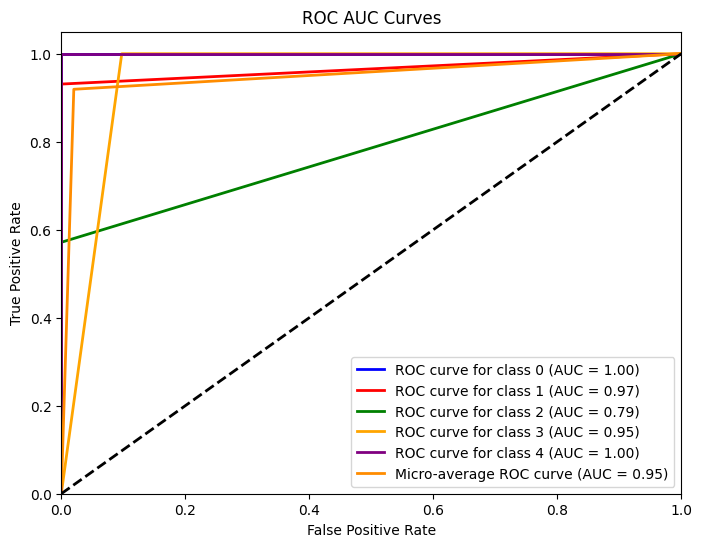

In [ ]:
# Transform y_test and y_pred into one-hot encoded format
num_classes = len(np.unique(y_test))
y_test_encoded = label_binarize(y_test, classes=np.arange(num_classes))
predictions = model.predict(x_test)
predictions_encoded = label_binarize(np.argmax(predictions, axis=1), classes=np.arange(num_classes))

# Initialize dictionaries to store FPR, TPR, and AUC values
fpr_dict = {}
tpr_dict = {}
auc_dict = {}
for class_idx in range(num_classes):
    fpr_dict[class_idx], tpr_dict[class_idx], _ = roc_curve(y_test_encoded[:, class_idx], predictions_encoded[:, class_idx])
    auc_dict[class_idx] = auc(fpr_dict[class_idx], tpr_dict[class_idx])

# Calculate micro-average ROC curve and AUC
fpr_micro_avg, tpr_micro_avg, _ = roc_curve(y_test_encoded.ravel(), predictions_encoded.ravel())
auc_micro_avg = auc(fpr_micro_avg, tpr_micro_avg)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
line_width = 2
palette = ['blue', 'red', 'green', 'orange', 'purple', 'black', 'brown', 'magenta', 'gray', 'maroon', 'navy', 'olive', 'pink']
for idx, color in zip(range(num_classes), palette):
    plt.plot(fpr_dict[idx], tpr_dict[idx], color=color, lw=line_width,
             label=f'ROC curve for class {idx} (AUC = {auc_dict[idx]:.2f})')
plt.plot(fpr_micro_avg, tpr_micro_avg, color='darkorange', lw=line_width,
         label=f'Micro-average ROC curve (AUC = {auc_micro_avg:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=line_width)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns


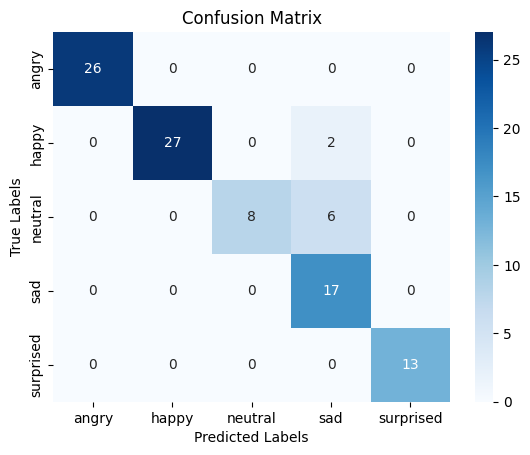

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

label_strings = [mapped[i] for i in range(len(mapped))]

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_strings, yticklabels=label_strings)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
